# Esercizio 12.1: Image recognition

testo diverse funzioni di ottimizzazione per valutare quali riescono a riconoscere meglio i numeri a partire dal dataset mnist presente nella libreria di keras

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [29]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


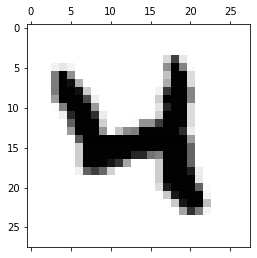

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [30]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [32]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam


def compile_model(opt=SGD()):  #default optimizer=SGD
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


### Test di diversi ottimizzatori


- RMSprop
- Adagrad
- Adadelta
- Adam
- Adamax
- Nadam

In [44]:
# training parameters
batch_size = 32
epochs = 5

optimizers=[Adam(), RMSprop(), Adagrad(), Adadelta(), Adamax(), Nadam()]
# create the deep neural net

histories=[]
accuracy_train=[]
accuracy_test=[]
loss_train=[]
loss_test=[]
predictions_opt=[]


for opt in optimizers:
  model_DNN = compile_model(opt)

  # train DNN and store training info in history
  history = model_DNN.fit(X_train, Y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(X_test, Y_test))
  score = model_DNN.evaluate(X_test, Y_test, verbose=1)

  # print performance
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  histories.append(history)
  accuracy_train.append(history.history['acc'][-1])
  accuracy_test.append(history.history['val_acc'][-1])
  loss_train.append(history.history['loss'][-1])
  loss_test.append(history.history['val_loss'][-1])

  predictions_opt.append(model_DNN.predict(X_test))


  # look into training history

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7991 - acc: 0.7660 - val_loss: 0.3176 - val_acc: 0.9125
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3932 - acc: 0.8876 - val_loss: 0.2421 - val_acc: 0.9312
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3156 - acc: 0.9100 - val_loss: 0.2050 - val_acc: 0.9388
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2727 - acc: 0.9229 - val_loss: 0.1775 - val_acc: 0.9465
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1621 - acc: 0.9490

Test loss: 0.16207173466682434
Test accuracy: 0.9490000009536743
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - acc: 0.9186 - val_loss: 0.1039 - val_acc: 0.9673
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - acc: 0.9648 - val_loss: 0.1000 - val_acc: 0.9703
Epoch 3/5
1875/1875 [=====================

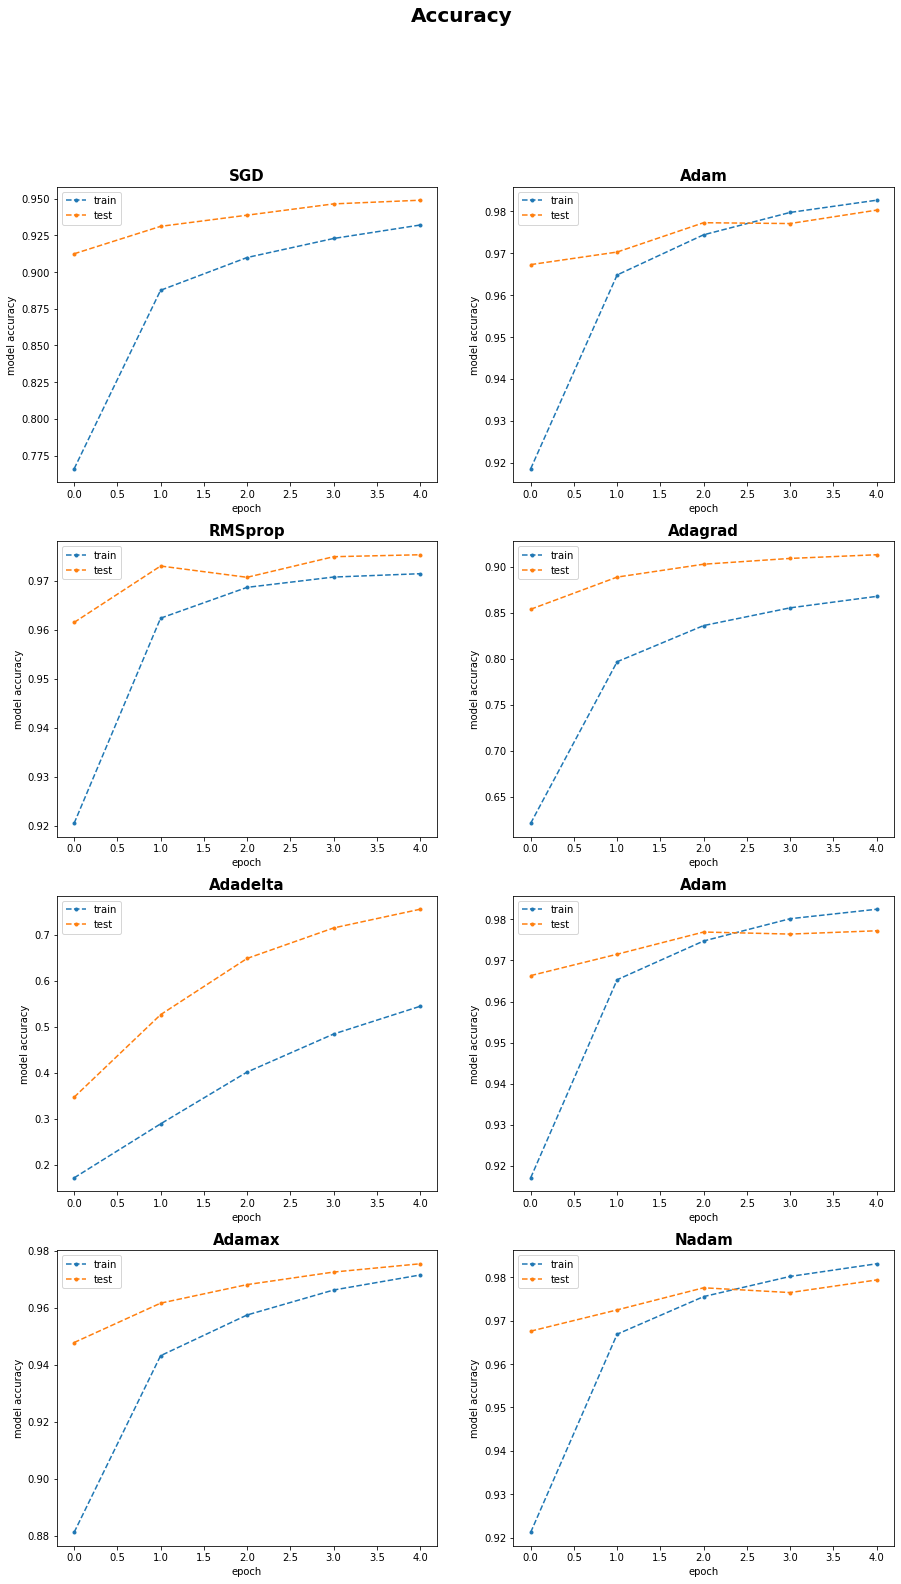

In [45]:
# evaluate model
titles=['Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']


k=0
fig,axes=plt.subplots(4,2,figsize=(15,25))
plt.suptitle('Accuracy', fontsize=20, fontweight='bold')
for i in range(4):
  for j in range(2):
    ax=axes[i][j]
    ax.plot(histories[k].history['acc'], '.--')
    ax.plot(histories[k].history['val_acc'], '.--')
    ax.set_ylabel('model accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='best')
    ax.set_title(titles[k], fontsize=15, fontweight='bold')

    k+=1





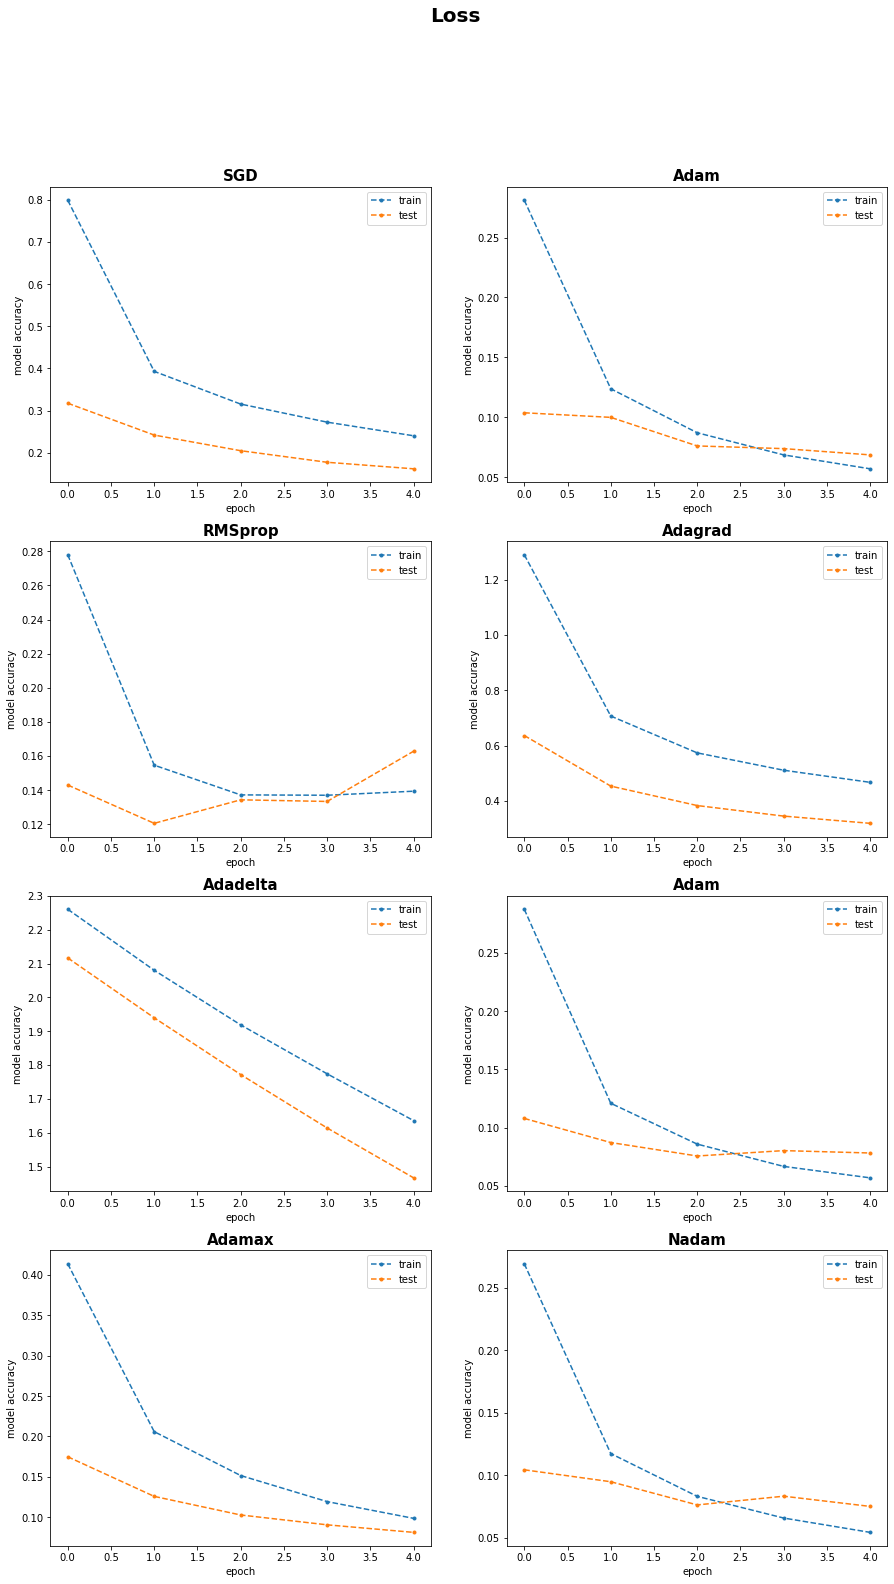

In [46]:
k=0
fig,axes=plt.subplots(4,2,figsize=(15,25))
plt.suptitle('Loss', fontsize=20, fontweight='bold')
for i in range(4):
  for j in range(2):
    ax=axes[i][j]
    ax.plot(histories[k].history['loss'], '.--')
    ax.plot(histories[k].history['val_loss'], '.--')
    ax.set_ylabel('model accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='best')
    ax.set_title(titles[k], fontsize=15, fontweight='bold')

    k+=1



Si nota come Adam, RSM_prop e Nadam sembrano rischiare l'overfitting: l'accuratezza del training cresce mentre quella del test cresce poco o niente.
Le altre sembrano funzionare bene, in particolare Adadelta andrebbe investigata per un numero di epoche più elevato, visto l'andamento ancora chiaramente crescente (nel caso dell'accuratezza) sia per il test che per il training. Mi aspetto quindi in generale un buon riconoscimento da parte di tutte le reti (ad eccezione forse di Adadelta che necessita di più epoche), tenendo però conto che alcune di queste potrebbero in generale non funzionare bene su altri campioni visto il rischio di overfitting

In [ ]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

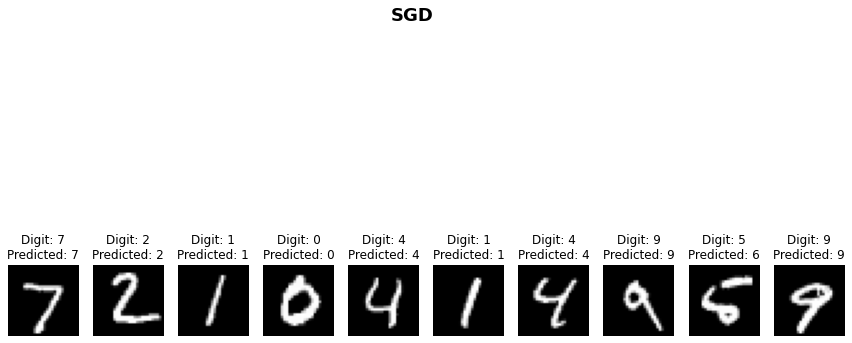

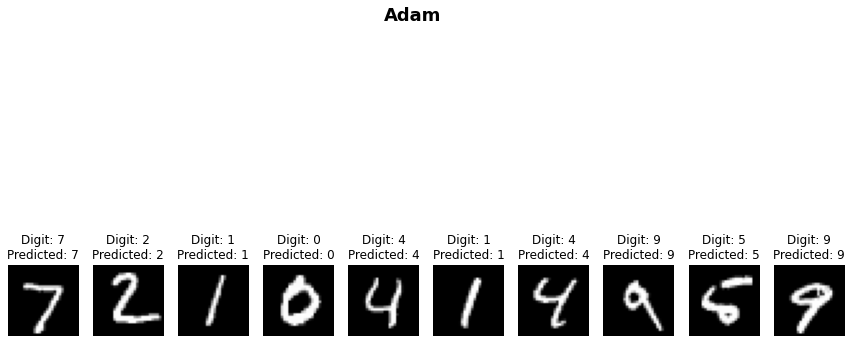

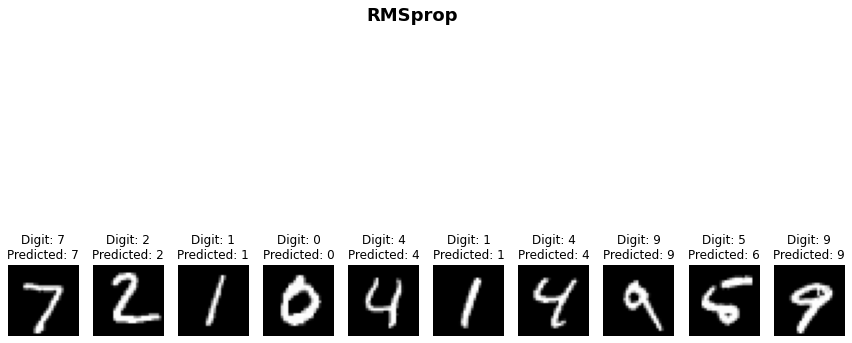

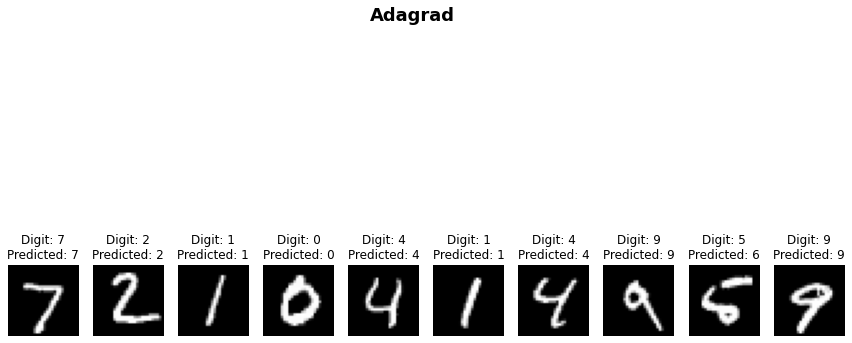

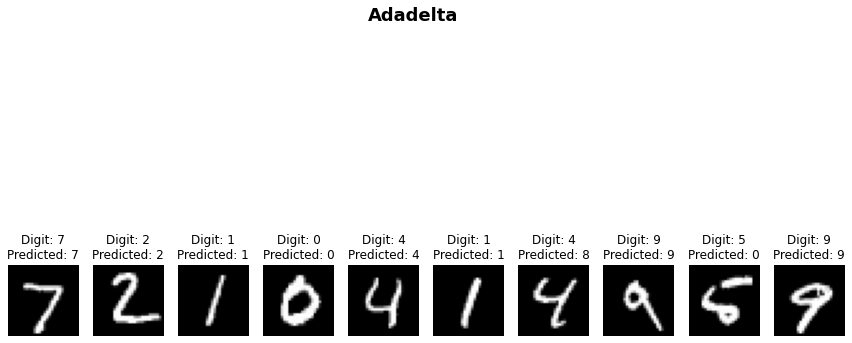

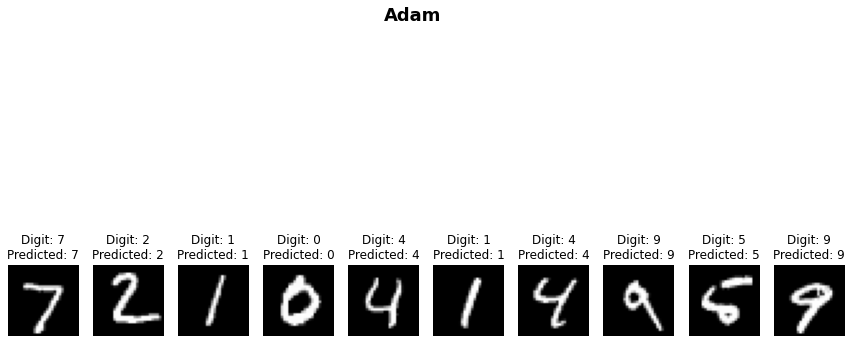

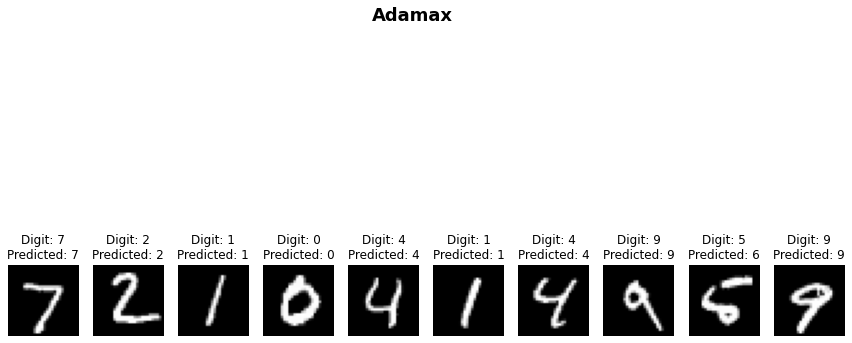

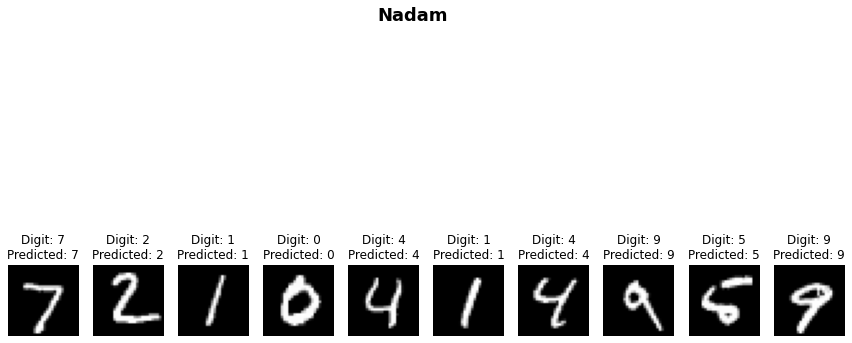

In [49]:
# predictins

for j in range(len(optimizers)):
  plt.figure(figsize=(15, 15)) 
  plt.suptitle(titles[j], fontsize=18, fontweight='bold')
  for i in range(10):    
      ax = plt.subplot(2, 10, i + 1)    
      plt.imshow(X_test[i, :, :, 0], cmap='gray')    
      plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions_opt[j][i])))    
      plt.axis('off') 
  plt.show()

Come mi aspettavo la peggiore è Adadelta, ma che come detto prima necessita probabilmente di più epoche. Le altre sembrano predirre bene tutti i numeri eccetto il penultimo che viene confuso da tutte per un 6, tranne che per Adam e Nadam, le quali andrebbero anch'esse investigate con un maggior numero di epoche per chiarire la presenza o meno di overfitting

------------------